<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/ClassificationDataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Going Through The Dataset

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')

In [98]:
df.head(3)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0


In [99]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [100]:
df.drop(columns=['ID'], inplace=True)
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [101]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
16-25,2016,2016,2016,2016,2016,1813,2016,2016,2016,2016,2016,1806,2016,2016,2016,2016,2016
26-39,3063,3063,3063,3063,3063,2744,3063,3063,3063,3063,3063,2765,3063,3063,3063,3063,3063
40-64,2931,2931,2931,2931,2931,2644,2931,2931,2931,2931,2931,2677,2931,2931,2931,2931,2931
65+,1990,1990,1990,1990,1990,1817,1990,1990,1990,1990,1990,1795,1990,1990,1990,1990,1990


In [102]:
df.groupby('RACE').count()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
RACE,,,,,,,,,,,,,,,,,
majority,9012,9012,9012,9012,9012,8113,9012,9012,9012,9012,9012,8136,9012,9012,9012,9012,9012
minority,988,988,988,988,988,905,988,988,988,988,988,907,988,988,988,988,988


In [103]:
df.groupby('GENDER').count()

,AGE,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
GENDER,,,,,,,,,,,,,,,,,
female,5010,5010,5010,5010,5010,4506,5010,5010,5010,5010,5010,4541,5010,5010,5010,5010,5010
male,4990,4990,4990,4990,4990,4512,4990,4990,4990,4990,4990,4502,4990,4990,4990,4990,4990


In [104]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0-9y,3530,3530,3530,3530,3530,3193,3530,3530,3530,3530,3530,3167,3530,3530,3530,3530,3530
10-19y,3299,3299,3299,3299,3299,2950,3299,3299,3299,3299,3299,2980,3299,3299,3299,3299,3299
20-29y,2119,2119,2119,2119,2119,1918,2119,2119,2119,2119,2119,1942,2119,2119,2119,2119,2119
30y+,1052,1052,1052,1052,1052,957,1052,1052,1052,1052,1052,954,1052,1052,1052,1052,1052


In [105]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [106]:
df.groupby('VEHICLE_OWNERSHIP').count().index

Float64Index([0.0, 1.0], dtype='float64', name='VEHICLE_OWNERSHIP')

# Some Graph Analysis

<Axes: xlabel='DRIVING_EXPERIENCE'>

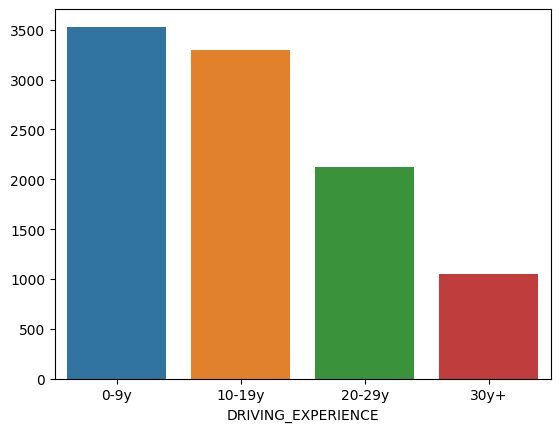

In [107]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.groupby('DRIVING_EXPERIENCE').count()['AGE']))

<Axes: xlabel='DRIVING_EXPERIENCE'>

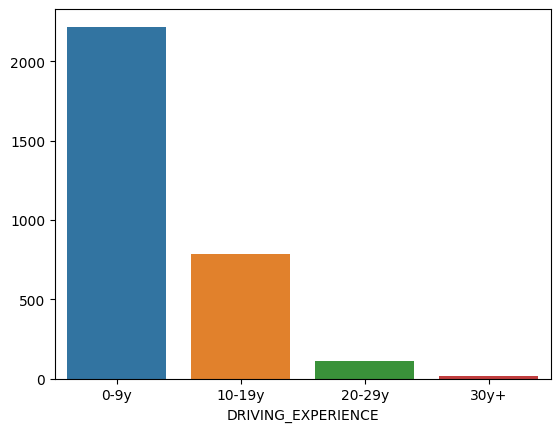

In [108]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.loc[df['OUTCOME']==1].groupby('DRIVING_EXPERIENCE').count()['AGE']))

<Axes: xlabel='DRIVING_EXPERIENCE'>

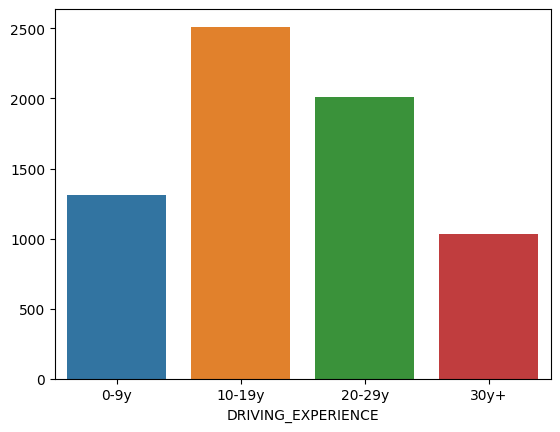

In [109]:
sns.barplot(x=df.groupby('DRIVING_EXPERIENCE').count()['AGE'].index, y=np.array(df.loc[df['OUTCOME']==0].groupby('DRIVING_EXPERIENCE').count()['AGE']))

<ipython-input-110-2af366b0e523>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


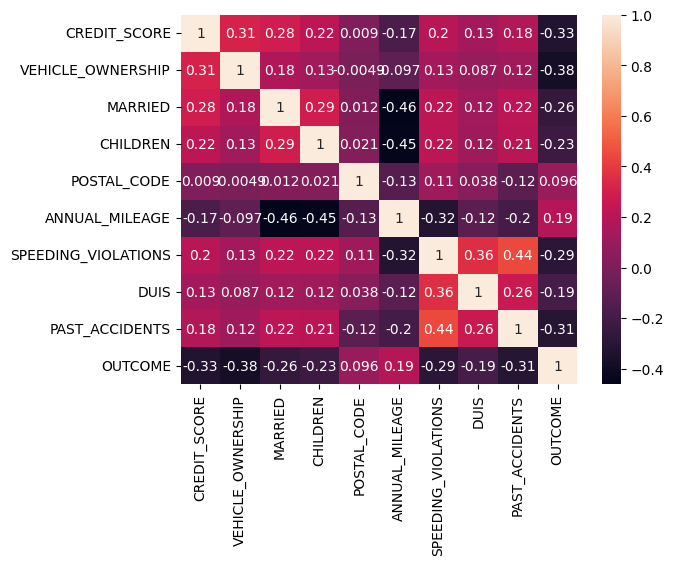

In [110]:
sns.heatmap(df.corr(), annot=True);

Intresting insights:
more the speed violations, less the milage, makes sense sports cars
Vehicle ownership is directly related to credit score

# HANDLING NANS

### CREDIT_SCORE

In [111]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [112]:
df['CREDIT_SCORE'].dtype

dtype('float64')

In [113]:
df['CREDIT_SCORE'].describe()

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
25%         0.417191
50%         0.525033
75%         0.618312
max         0.960819
Name: CREDIT_SCORE, dtype: float64

looking at distribution

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

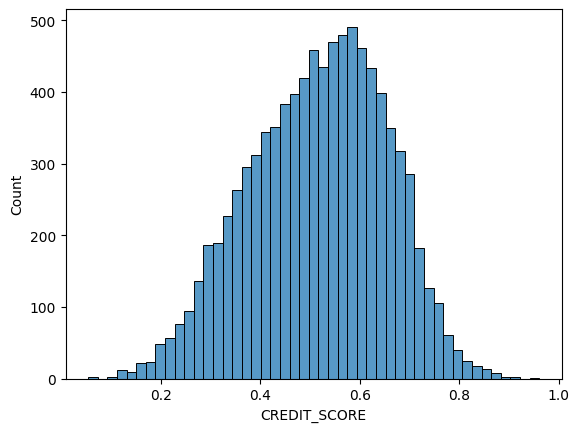

In [114]:
sns.histplot(df['CREDIT_SCORE'])

In [115]:
df2=df['CREDIT_SCORE'].copy()

In [116]:
df2.loc[df2.isnull()]=df2.mean()

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

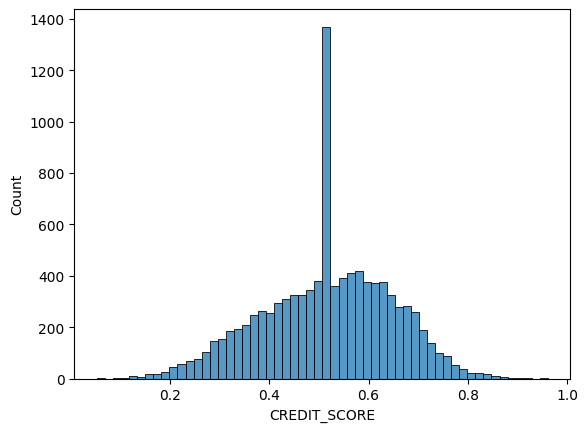

In [117]:
sns.histplot(df2)

WE CANNOT REPLACE CREDIT SCORE BY MEAN OR MEDIAN OR MODE

WE MUST TRY BY SUB-ML MODEL, ELSE DROP

In [118]:
df2=df['CREDIT_SCORE'].copy()

In [119]:
from sklearn.linear_model import LinearRegression
trainX=df[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']].loc[~df2.isnull()]
testX=df[['VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']].loc[df2.isnull()]
trainY=df2.loc[~df2.isnull()]

In [120]:
from sklearn import linear_model
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

In [121]:
print(len(lr.predict(testX)))
print(len(df2.loc[df2.isnull()]))

982
982


In [122]:
df2.loc[df2.isnull()]=lr.predict(testX)

<Axes: xlabel='CREDIT_SCORE', ylabel='Count'>

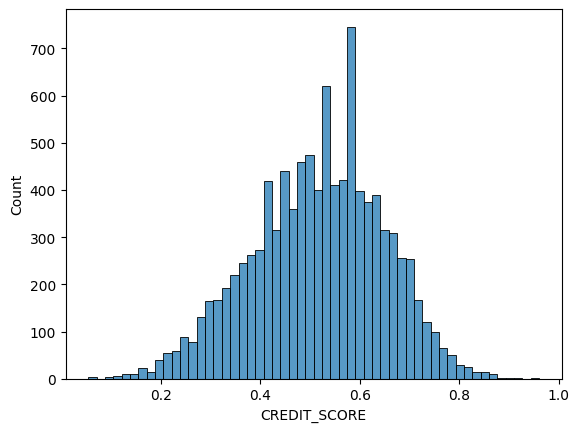

In [123]:
sns.histplot(df2)

WORKS SO WELLLLLLL!!!!!!, LETZ GO

WE CHOOSE THE 3 PARAMETERS FOR LR BCOZ IN CORR MAP THEY MOST SIGNIFICANT

In [124]:
df['CREDIT_SCORE']=df2

In [125]:
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE             0
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

### ANNUAL_MILEAGE

In [126]:
df['ANNUAL_MILEAGE'].dtype

dtype('float64')

In [127]:
df['ANNUAL_MILEAGE'].describe()

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: ANNUAL_MILEAGE, dtype: float64

In [128]:
df['ANNUAL_MILEAGE']=pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')['ANNUAL_MILEAGE']

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

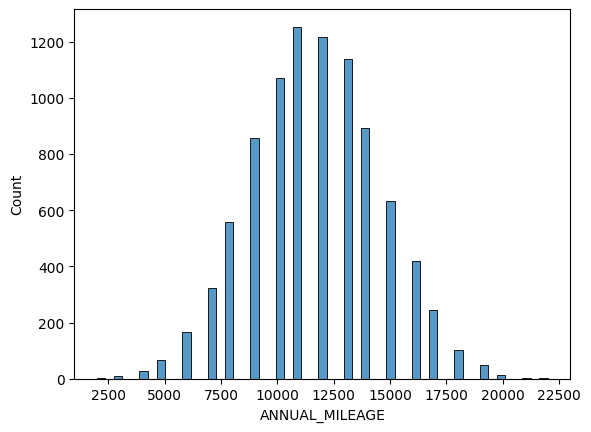

In [129]:
df2=df['ANNUAL_MILEAGE'].copy()
sns.histplot(df2)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

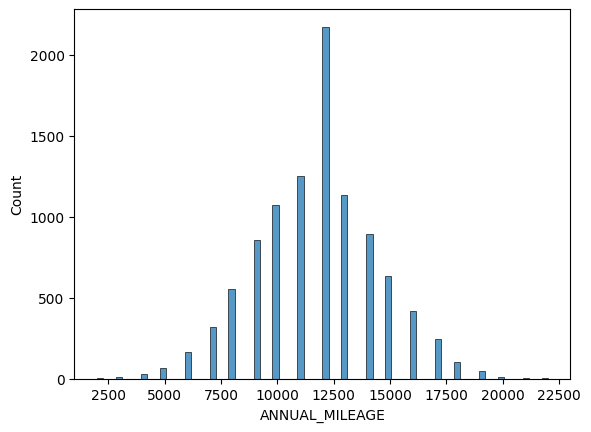

In [130]:
df2.loc[df2.isnull()]=df2.median()
sns.histplot(df2)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

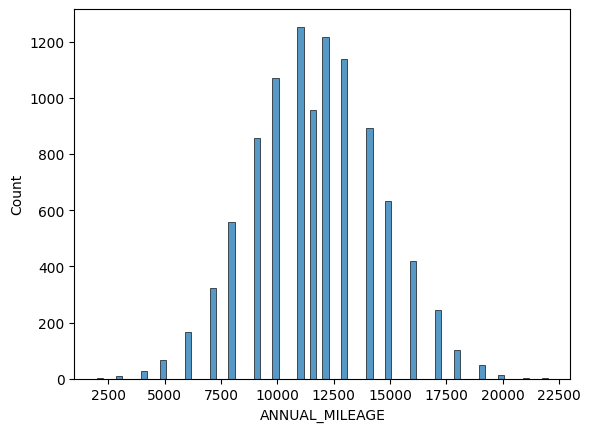

In [131]:
df2=df['ANNUAL_MILEAGE'].copy()
df2.loc[df2.isnull()]=df2.mean()
sns.histplot(df2)

In [132]:
df2=df['ANNUAL_MILEAGE'].copy()
from sklearn.linear_model import LinearRegression
trainX=df[['SPEEDING_VIOLATIONS', 'MARRIED', 'CHILDREN']].loc[~df2.isnull()]
testX=df[['SPEEDING_VIOLATIONS', 'MARRIED', 'CHILDREN']].loc[df2.isnull()]
trainY=df2.loc[~df2.isnull()]

In [133]:
lr = LinearRegression()
lr.fit(trainX, trainY)

LinearRegression()

In [134]:
df2.loc[df2.isnull()]=lr.predict(testX)

<Axes: xlabel='ANNUAL_MILEAGE', ylabel='Count'>

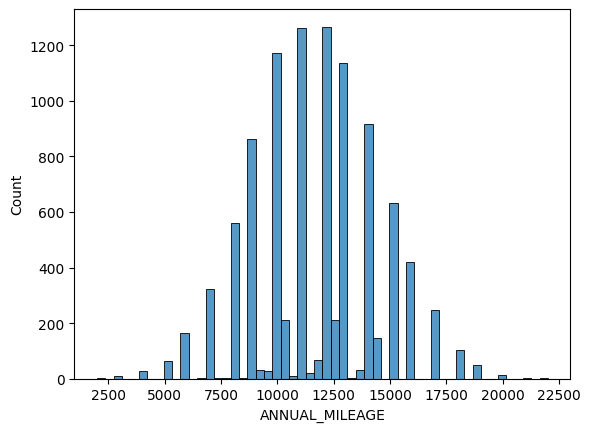

In [135]:
sns.histplot(df2)

AGAIN WE OBSERVE THAT UPON USING REGRESSION FOR FILLING NAN VALUES, WE ATTAIN MORE EVENLY DISTRIBUTION

In [136]:
df['ANNUAL_MILEAGE']=df2

In [137]:
df.isnull().sum()

AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

### POST-MISSING-VALUES-ANALYSIS

In [138]:
df.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515511,0.697000,0.498200,0.688800,19864.548400,11697.695694,1.482900,0.23920,1.056300,0.313300
std,0.132017,0.459578,0.500022,0.463008,18915.613855,2727.572287,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.425515,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.524205,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.607607,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


<ipython-input-139-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

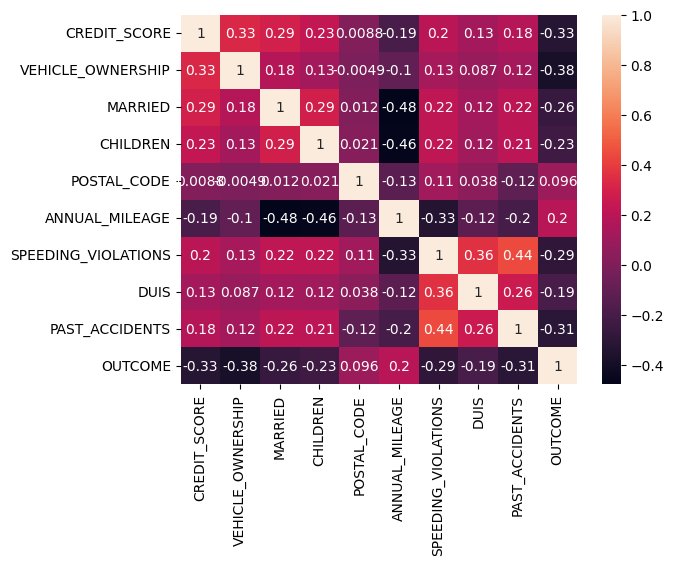

In [139]:
sns.heatmap(df.corr(), annot=True)

# ENCODING

In [184]:
df.dtypes

AGE                      int64
GENDER                   int64
RACE                     int64
DRIVING_EXPERIENCE       int64
EDUCATION                int64
INCOME                   int64
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP        int64
VEHICLE_YEAR             int64
MARRIED                float64
CHILDREN                 int64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE             int64
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

#### VEHICLE_TYPE

In [141]:
df.groupby('VEHICLE_TYPE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_TYPE,,,,,,,,,,,,,,,,,
sedan,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523
sports car,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


In [142]:
df.loc[df['VEHICLE_TYPE']=='sedan', 'VEHICLE_TYPE']=0

In [143]:
df.loc[df['VEHICLE_TYPE']=='sports car', 'VEHICLE_TYPE']=1

In [144]:
df.groupby('VEHICLE_TYPE').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_TYPE,,,,,,,,,,,,,,,,,
0,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523,9523
1,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477


In [145]:
df['VEHICLE_TYPE']=df['VEHICLE_TYPE'].astype('int64')

#### GENDER

In [146]:
df.loc[df['GENDER']=='male', 'GENDER']=1

In [147]:
df.loc[df['GENDER']=='female', 'GENDER']=0

In [148]:
df.groupby('GENDER').count()

,AGE,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
GENDER,,,,,,,,,,,,,,,,,
0,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010,5010
1,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990,4990


In [149]:
df['GENDER']=df['GENDER'].astype('int64')

#### RACE

In [150]:
df['RACE']=pd.read_csv('/content/drive/MyDrive/Datasets/Car_Insurance.csv')['RACE']
df.loc[df['RACE']=='majority', 'RACE']=1

In [151]:
df.loc[df['RACE']=='minority', 'RACE']=0

In [152]:
df.groupby('RACE').count()

,AGE,GENDER,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
RACE,,,,,,,,,,,,,,,,,
0,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988,988
1,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012


In [153]:
df['RACE']=df['RACE'].astype('int64')

#### EDUCATION

In [154]:
df.groupby('EDUCATION').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
EDUCATION,,,,,,,,,,,,,,,,,
high school,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
none,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
university,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928


In [155]:
df.loc[df['EDUCATION']=='none', 'EDUCATION']=0
df.loc[df['EDUCATION']=='high school', 'EDUCATION']=1
df.loc[df['EDUCATION']=='university', 'EDUCATION']=2

In [156]:
df.groupby('EDUCATION').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
EDUCATION,,,,,,,,,,,,,,,,,
0,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
1,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
2,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928,3928


In [157]:
df['EDUCATION']=df['EDUCATION'].astype('int64')

#### INCOME

In [158]:
df.groupby('INCOME').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
INCOME,,,,,,,,,,,,,,,,,
middle class,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
poverty,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
upper class,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336
working class,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712


In [159]:
df.loc[df['INCOME']=='poverty', 'INCOME']=0
df.loc[df['INCOME']=='working class', 'INCOME']=1
df.loc[df['INCOME']=='middle class', 'INCOME']=2
df.loc[df['INCOME']=='upper class', 'INCOME']=3

In [160]:
df.groupby('INCOME').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
INCOME,,,,,,,,,,,,,,,,,
0,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814,1814
1,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712
2,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
3,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336,4336


In [161]:
df['INCOME']=df['INCOME'].astype('int64')

#### VEHICLE YEAR

In [162]:
df.groupby('VEHICLE_YEAR').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_YEAR,,,,,,,,,,,,,,,,,
after 2015,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033
before 2015,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967


In [163]:
df.loc[df['VEHICLE_YEAR']=='after 2015', 'VEHICLE_YEAR']=0
df.loc[df['VEHICLE_YEAR']=='before 2015', 'VEHICLE_YEAR']=1

In [164]:
df.groupby('VEHICLE_YEAR').count()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
VEHICLE_YEAR,,,,,,,,,,,,,,,,,
0,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033,3033
1,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967,6967


In [165]:
df['VEHICLE_YEAR']=df['VEHICLE_YEAR'].astype('int64')

#### DRIVING_EXPERIENCE

In [166]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0-9y,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
10-19y,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299
20-29y,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119
30y+,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052


In [167]:
df.loc[df['DRIVING_EXPERIENCE']=='0-9y', 'DRIVING_EXPERIENCE']=0
df.loc[df['DRIVING_EXPERIENCE']=='10-19y', 'DRIVING_EXPERIENCE']=1
df.loc[df['DRIVING_EXPERIENCE']=='20-29y', 'DRIVING_EXPERIENCE']=2
df.loc[df['DRIVING_EXPERIENCE']=='30y+', 'DRIVING_EXPERIENCE']=3

In [168]:
df.groupby('DRIVING_EXPERIENCE').count()

,AGE,GENDER,RACE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
DRIVING_EXPERIENCE,,,,,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299,3299
2,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119,2119
3,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052


In [169]:
df['DRIVING_EXPERIENCE']=df['DRIVING_EXPERIENCE'].astype('int64')

#### AGE

In [170]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
16-25,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
26-39,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063
40-64,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931
65+,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990


In [171]:
df.loc[df['AGE']=='16-25', 'AGE']=0
df.loc[df['AGE']=='26-39', 'AGE']=1
df.loc[df['AGE']=='40-64', 'AGE']=2
df.loc[df['AGE']=='65+', 'AGE']=3

In [173]:
df.groupby('AGE').count()

,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
AGE,,,,,,,,,,,,,,,,,
0,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
1,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063,3063
2,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931
3,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990


In [174]:
df['AGE']=df['AGE'].astype('int64')

#### Vehicle Ownership

In [178]:
df['VEHICLE_OWNERSHIP']=df['VEHICLE_OWNERSHIP'].astype('int64')

#### CHILDERN

In [182]:
df['CHILDREN']=df['CHILDREN'].astype('int64')

#### MARRIED

In [185]:
df['MARRIED']=df['MARRIED'].astype('int64')

#### ANNUAL_MILEAGE

In [190]:
df['ANNUAL_MILEAGE']=df['ANNUAL_MILEAGE'].astype('int64')

#### A LOOK AT DATA

In [191]:
df.head(6)

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,0,1,0,1,3,0.629027,1,0,0,1,10238,12000,0,0,0,0,0.0
1,0,1,1,0,0,0,0.357757,0,1,0,0,10238,16000,0,0,0,0,1.0
2,0,0,1,0,1,1,0.493146,1,1,0,0,10238,11000,0,0,0,0,0.0
3,0,1,1,0,2,1,0.206013,1,1,0,1,32765,11000,0,0,0,0,0.0
4,1,1,1,1,0,1,0.388366,1,1,0,0,32765,12000,0,2,0,1,1.0
5,2,0,1,2,1,3,0.619127,1,0,0,1,10238,13000,0,3,0,3,0.0


# HANDLING OUTLIERS